In [1]:
import numpy as np

In [2]:
noObs = np.loadtxt('./obsGauge_8', usecols = np.arange(0,7), skiprows=1, dtype=np.float32)

In [3]:
np.shape(noObs)

(38269, 7)

In [3]:
gauge_time = noObs[:, 0];
gauge_h = noObs[:, 4];
gauge_uh = noObs[:, 5];

In [4]:
gauge_u = np.zeros_like(gauge_h);
for i in range(0, np.size(gauge_h)):
    if(gauge_h[i]<1e-6):
        gauge_u[i] = 0.0;
    else:
        gauge_u[i] =gauge_uh[i]/gauge_h[i];

In [11]:
np.shape(gauge_u)

(2071,)

In [5]:
force = np.loadtxt('./f_8', usecols = (0,1), dtype=np.float32)

In [7]:
np.shape(force)

(21375, 2)

In [6]:
# calculate the dimensionless drag coefficient C_D
force_t = force[:, 0];
force_f = force[:, 1];
cd = np.zeros_like(force);
rho = 1000.0
width = 0.30
# interpolation to get free-stream velocity
for i in range(0, int(np.prod(force_t.shape))-1):
    for j in range(0, int(np.prod(gauge_time.shape))-2):
        free_stream_u = 0.0
        free_stream_h = 0.0
        if(gauge_time[j]<=force_t[i] and gauge_time[j+1]>=force_t[i]):
            free_stream_u = gauge_u[j]+(force_t[i]-gauge_time[j])*(gauge_u[j+1]-gauge_u[j])/(gauge_time[j+1]-gauge_time[j]);
            free_stream_h = gauge_h[j]+(force_t[i]-gauge_time[j])*(gauge_h[j+1]-gauge_h[j])/(gauge_time[j+1]-gauge_time[j]);
            break
    if (free_stream_h<1e-6):
        cd[i, 1]=0.0
        cd[i, 0]=force_t[i]
    else:
        # calculate CD
        cd[i, 1] = force_f[i]/(0.50*rho*width*free_stream_h*free_stream_u**2.0)
        cd[i, 0]=force_t[i]

In [43]:
# np.prod(cd.shape)
# np.size(cd)
cd

array([[0.0000000e+00, 0.0000000e+00],
       [1.2500000e-03, 0.0000000e+00],
       [2.4691401e-03, 0.0000000e+00],
       ...,
       [3.9991000e+00, 2.3988349e+00],
       [3.9995501e+00, 2.3786845e+00],
       [0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [7]:
import csv

In [8]:
file_name = 'cd_gauge8_f8.txt'
cd_t = cd[:,0]
cd_val = cd[:,1]
with open(file_name, 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(np.transpose(cd_t), np.transpose(cd_val)))

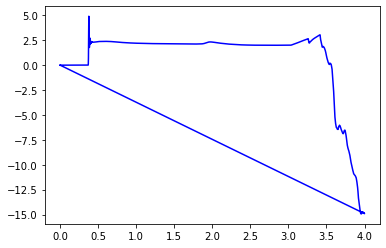

In [9]:
import matplotlib.pyplot as plt
plt.plot(cd_t, cd_val, color="blue")